In [1]:
from zhh import zhh_cuts, fetch_preselection_data, Cut
import zhh, os
from glob import glob
import uproot as ur
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [21]:
prefix1 = '/home/ilc/bliewert/jobresults/550-llhh-ana'
prefix2 = '/home/ilc/bliewert/jobresults/550-2l4q-ana'

files = glob(f'{prefix1}/*.root') + glob(f'{prefix2}/*.root')
output = list(filter(lambda path: any([elem in path for elem in ['e1e1hh', 'e2e2hh', 'P6f']]), files))
output.sort()

print(f'Found {len(output)} output files')

Found 1279 output files


In [23]:
output

['/home/ilc/bliewert/jobresults/550-2l4q-ana/E550-TDR_ws.P6f_eexxxx.Gwhizard-3_1_5.eL.pL.I410026.1-0_AIDA.root',
 '/home/ilc/bliewert/jobresults/550-2l4q-ana/E550-TDR_ws.P6f_eexxxx.Gwhizard-3_1_5.eL.pL.I410026.2-0_AIDA.root',
 '/home/ilc/bliewert/jobresults/550-2l4q-ana/E550-TDR_ws.P6f_eexxxx.Gwhizard-3_1_5.eL.pL.I410026.3-0_AIDA.root',
 '/home/ilc/bliewert/jobresults/550-2l4q-ana/E550-TDR_ws.P6f_eexxxx.Gwhizard-3_1_5.eL.pL.I410026.4-0_AIDA.root',
 '/home/ilc/bliewert/jobresults/550-2l4q-ana/E550-TDR_ws.P6f_eexxxx.Gwhizard-3_1_5.eL.pL.I410026.5-0_AIDA.root',
 '/home/ilc/bliewert/jobresults/550-2l4q-ana/E550-TDR_ws.P6f_eexxxx.Gwhizard-3_1_5.eL.pL.I410026.6-0_AIDA.root',
 '/home/ilc/bliewert/jobresults/550-2l4q-ana/E550-TDR_ws.P6f_eexxxx.Gwhizard-3_1_5.eL.pR.I410027.0-0_AIDA.root',
 '/home/ilc/bliewert/jobresults/550-2l4q-ana/E550-TDR_ws.P6f_eexxxx.Gwhizard-3_1_5.eL.pR.I410027.1-0_AIDA.root',
 '/home/ilc/bliewert/jobresults/550-2l4q-ana/E550-TDR_ws.P6f_eexxxx.Gwhizard-3_1_5.eL.pR.I410027

In [22]:
ur.concatenate(output)

ValueError: TTree object paths must be specified in the 'files' as {"filenames*.root": "path"} if any files have more than one TTree

    TTrees: 'EventObservablesQQ', 'KinFitQQZZZ', 'KinFitQQZZH', 'KinFitQQZHH', 'KinFitQQNMC', 'EventObservablesVV', 'KinFitVVZZZ', 'KinFitVVZZH', 'KinFitVVZHH', 'KinFitVVNMC', 'EventObservablesLL', 'KinFitLLZZZ', 'KinFitLLZZH', 'KinFitLLZHH', 'KinFitLLNMC', 'SLDCorrection', 'LeptonPairing', 'FinalStates', 'HdecayMode', 'ntp'

in file /home/ilc/bliewert/jobresults/550-2l4q-ana/E550-TDR_ws.P6f_eexxxx.Gwhizard-3_1_5.eL.pL.I410026.1-0_AIDA.root

In [3]:
from configurations import llhh1_lvbbqq
WORK_ROOT = '/home/ilc/bliewert/jobresults/analysis'

llhh1_lvbbqq.initialize(WORK_ROOT, root_files=output)
llhh1_lvbbqq.fetch()

ValueError: could not broadcast input array from shape (0,) into shape (3500791,)

In [4]:
rf = llhh1_lvbbqq.rf

In [6]:
a = fetch_preselection_data(rf)

ValueError: could not broadcast input array from shape (0,) into shape (3500791,)

In [12]:
rf['EventObservablesLL']['mzll'].array()

<Array [] type='0 * float32'>

In [15]:
rf['EventObservablesLL/errorCode'].array()

<Array [] type='0 * int32'>

In [8]:
a.nbytes

NameError: name 'a' is not defined

In [ ]:
llhh1_lvbbqq.rf

<ReadOnlyDirectory '/' at 0x7fba6bc8da10>

In [40]:
sig_file = '/home/ilc/bliewert/DevRepositories/ZHH/scripts/sig/zhh_AIDA.root'
bkg_file = '/home/ilc/bliewert/DevRepositories/ZHH/scripts/bkg/zhh_AIDA.root'
merged_file = '/home/ilc/bliewert/DevRepositories/ZHH/scripts/target.root'

sig = ur.open(sig_file)
bkg = ur.open(bkg_file)
merged = ur.open(merged_file)
data = fetch_preselection_data(merged_file)

In [41]:
a = data[data['xx_nisoleps'] == 2]

a['event'][a['ll_mh1'] == 0]

array([579530], dtype=uint32)

In [42]:
a[a['event'] == 579530]

array([(1112, 3, 579530, 11, 0, 0, 0, 0.7567164, 343.5149, 42.100082, 199.53299, 2, 0, 0., 0., 0., 0, 0., 0., 133.12218, 134.04944, 339.01794, 131.85199, 97.89545, 0.000218, 0.84293354, 0.52192885, 0.00732994, 0.000218, 0.84293354, 0.52192885, 0.00732994, 0.9998361, 0.00014139, 0.00019322, 0.52192885, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2)],
      dtype=[('process', '<u4'), ('pol_code', 'u1'), ('event', '<u4'), ('event_category', 'u1'), ('ll_pass', 'u1'), ('vv_pass', 'u1'), ('qq_pass', 'u1'), ('xx_thrust', '<f4'), ('xx_e_vis', '<f4'), ('xx_pt_miss', '<f4'), ('xx_invmass_miss', '<f4'), ('xx_nisoleps', 'u1'), ('passed', 'u1'), ('weight', '<f4'), ('ll_mh1', '<f4'), ('ll_mh2', '<f4'), ('ll_dilepton_type', 'u1'), ('ll_mz', '<f4'), ('ll_mz_pre_pairing', '<f4'), ('vv_mh1', '<f4'), ('vv_mh2', '<f4'), ('vv_mhh', '<f4'), ('qq_mh1', '<f4'), ('qq_mh2', '<f4'), ('ll_bmax1', '<f4'), ('ll_bmax2', '<f4'), ('ll_bmax3', '<f4'), ('ll_bmax4', '<f4'), ('vv_bmax1', '<f4'), ('vv_bmax2', '<f4')

In [43]:
a[a['event'] == 579530]['xx_nisoleps']

array([2], dtype=uint8)

(MH1, MH2) 0 entries = (0, 0)


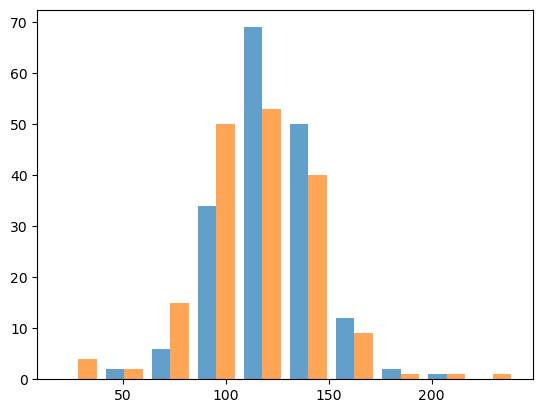

In [46]:
mode = 'LL_ZHH'
a = 'Boson2BeforeFit'
b = 'Boson2AfterFit'

mask = np.array(merged[f'EventObservablesLL/zhh_mz'].array() > 0)
err = np.array(merged[f'KinFit{mode}']['FitErrorCode'].array())
mask = (mask) #& (err == 0)

zhh_mh1 = np.array(merged[f'EventObservablesLL/zhh_mh1'].array())[mask]
zhh_mh2 = np.array(merged[f'EventObservablesLL/zhh_mh2'].array())[mask]

plt.hist([zhh_mh1, zhh_mh2], alpha=0.7)
print(f'(MH1, MH2) 0 entries = ({(zhh_mh1 == 0).sum()}, {(zhh_mh2 == 0).sum()})')

In [3]:
merged['FinalStates'].keys()

['run',
 'event',
 'error_code',
 'final_states',
 'final_state_counts',
 'final_state_counts/final_state_counts.first',
 'final_state_counts/final_state_counts.second',
 'process',
 'polarization_code',
 'cross_section',
 'event_category',
 'event_category_zhh',
 'n_fermion',
 'n_higgs',
 'n_b_from_higgs',
 'n_c_from_higgs']

In [5]:
merged['FinalStates/polarization_code'].array()

<Array [3, 3, 3, 3, 3, 3, 3, 3, ..., 0, 0, 0, 0, 0, 0, 0] type='198 * uint16'>

In [3]:
merged['FinalStates/final_state_counts/final_state_counts.first'].array(entry_stop=1)

<Array [[1, 2, 3, 4, 5, 6, ..., 16, 21, 22, 23, 24, 25]] type='1 * var * int32'>

In [4]:
# background: 2 leptons, 4 jets

In [5]:
merged['FinalStates/final_state_counts/final_state_counts.second'].array()

<Array [[0, 0, 0, 0, 4, 0, ..., 0, 0, 0, 0, 0], ...] type='198 * var * int32'>

In [6]:
np.isin(np.array(merged['FinalStates/process'].array()), [zhh.ProcessCategories.e1e1hh, zhh.ProcessCategories.e2e2hh]) & (np.array(merged['FinalStates/n_b_from_higgs'].array()) == 4)

array([ True, False,  True, False, False, False,  True,  True,  True,
       False, False,  True, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False,  True, False,  True,
        True, False,  True,  True,  True, False, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [7]:
#fsc = 
#merged['FinalStates']['n_higgs'].array() == 2

(Pre, Post) 0 entries = (0, 36)


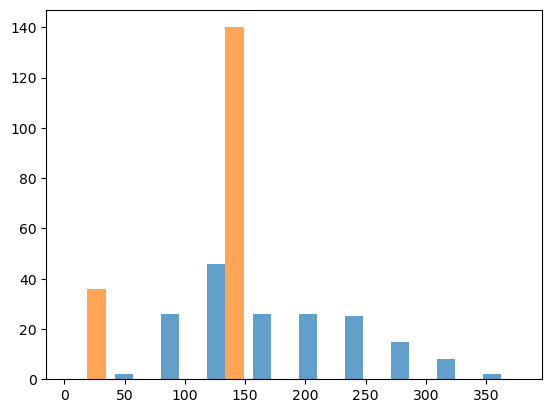

In [8]:
mode = 'LL_ZHH'
a = 'Boson2BeforeFit'
b = 'Boson2AfterFit'

mask = np.array(merged[f'KinFit{mode}']['nIsoLeptons'].array() == 2)
err = np.array(merged[f'KinFit{mode}']['FitErrorCode'].array())
mask = (mask) #& (err == 0)

preFit  = np.array(merged[f'KinFit{mode}'][a].array())[mask]
postFit = np.array(merged[f'KinFit{mode}'][b].array())[mask]

plt.hist([preFit, postFit], alpha=0.7)
print(f'(Pre, Post) 0 entries = ({(preFit == 0).sum()}, {(postFit == 0).sum()})')

(Pre, Post) 0 entries = (0, 17)


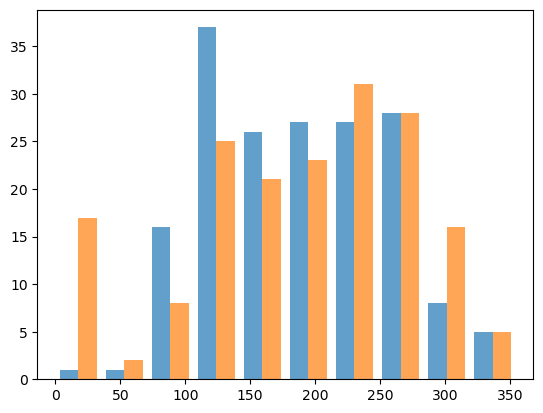

In [9]:
mode = 'LL_NMC'
a = 'Boson2BeforeFit'
b = 'Boson2AfterFit'

mask = np.array(merged[f'KinFit{mode}']['nIsoLeptons'].array() == 2)
err = np.array(merged[f'KinFit{mode}']['FitErrorCode'].array())
mask = (mask) #& (err == 0)

preFit  = np.array(merged[f'KinFit{mode}'][a].array())[mask]
postFit = np.array(merged[f'KinFit{mode}'][b].array())[mask]

plt.hist([preFit, postFit], alpha=0.7)
print(f'(Pre, Post) 0 entries = ({(preFit == 0).sum()}, {(postFit == 0).sum()})')

(array([17.,  2.,  8., 25., 21., 23., 31., 28., 16.,  5.]),
 array([  0.        ,  35.42832565,  70.85665131, 106.28498077,
        141.71330261, 177.14163208, 212.56996155, 247.99829102,
        283.42660522, 318.85494995, 354.28326416]),
 <BarContainer object of 10 artists>)

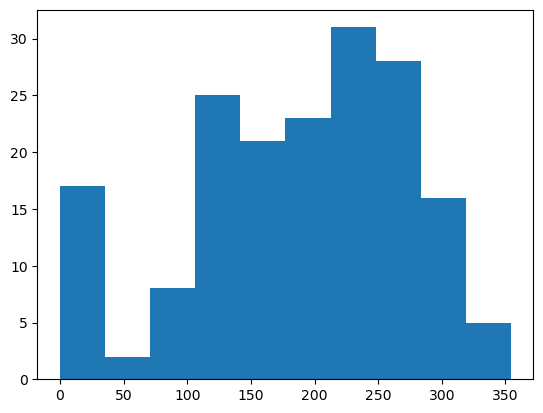

In [113]:
plt.hist(posFit)

In [66]:
np.unique(vals, return_counts=True)

<Array [[0, 1], [159, 17]] type='2 * var * int64'>

In [58]:
mask = np.array(merged[f'KinFit{ps}_ZHH']['nIsoLeptons'].array() == 2)
merged[f'KinFitLL_ZHH']['FitChi2'].array()[mask]
merged[f'KinFitLL_ZHH']['FitProbability'].array()[mask]

<Array [6.6e-25, 0, 3.94e-20, 0, ..., 0, 0, 0, 0] type='176 * float32'>

Text(0.5, 0.98, 'e2e2hh Events- ZHH KinFit')

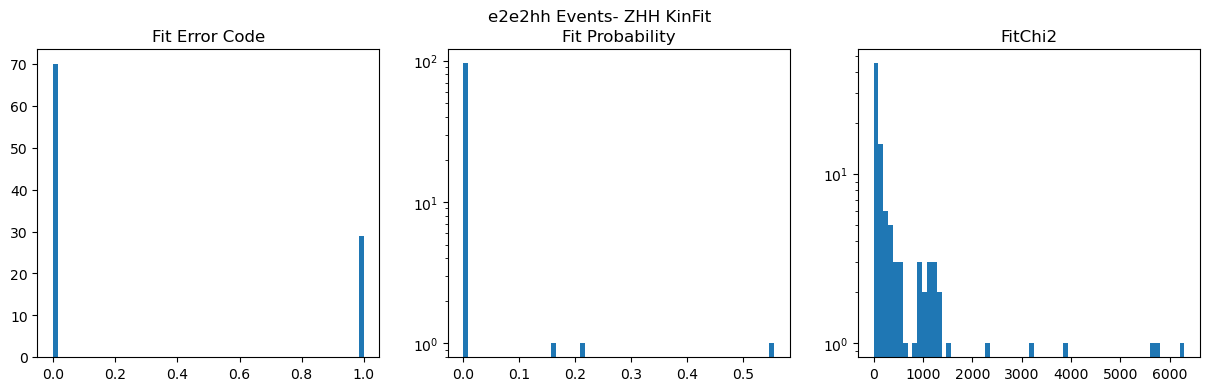

In [74]:
kwargs = { 'bins': 64 }
mask = merged['FinalStates/process'].array() == zhh.ProcessCategories.e2e2hh

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 4))
ax1.hist(merged[f'KinFitLL_ZHH']['FitErrorCode'].array()[mask], **kwargs)
ax1.set_title('Fit Error Code')

ax2.hist(merged[f'KinFitLL_ZHH']['FitProbability'].array()[mask], **kwargs)
ax2.set_yscale('log')
ax2.set_title('Fit Probability')

ax3.hist(merged[f'KinFitLL_ZHH']['FitChi2'].array()[mask], **kwargs)
ax3.set_yscale('log')
ax3.set_title('FitChi2')

fig.suptitle('e2e2hh Events- ZHH KinFit')

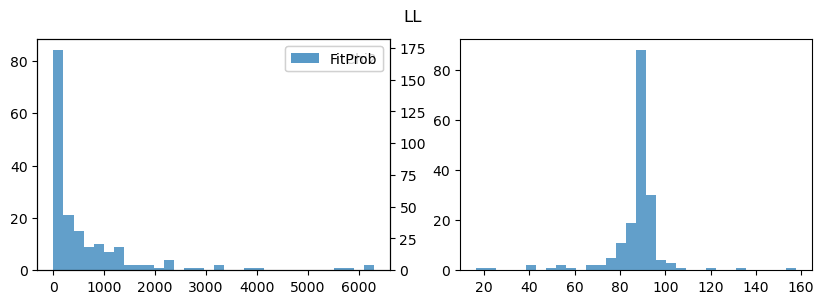

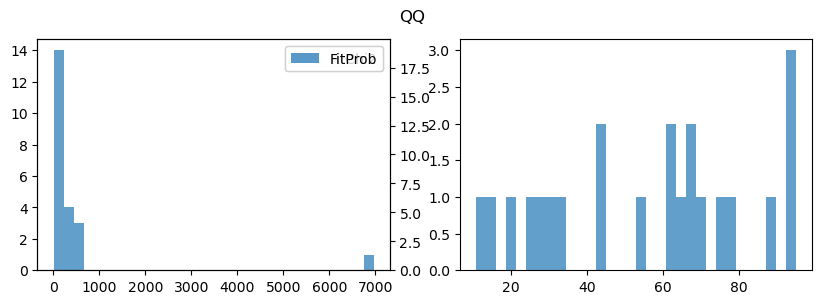

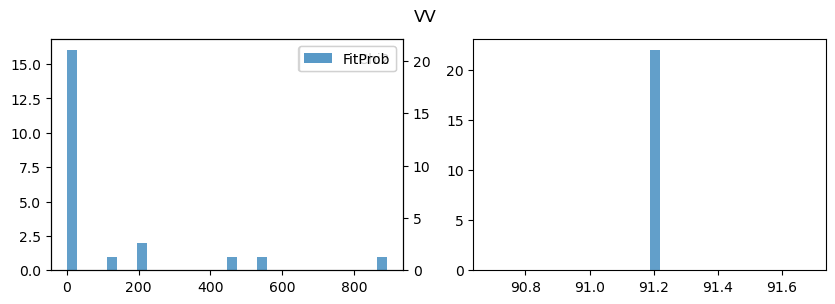

In [57]:
kwargs = {
    'bins': 32,
    'alpha': 0.7,
}

for ps, nisol in [
    ('LL', 2),
    ('QQ', 0),
    ('VV', 0)
]:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))
    mask = np.array(merged[f'KinFit{ps}_ZHH']['nIsoLeptons'].array() == nisol)

    ax1.hist(merged[f'KinFit{ps}_ZHH']['FitChi2'].array()[mask], label='FitChi2', **kwargs )
    ax12 = ax1.twinx()
    ax12.hist(merged[f'KinFit{ps}_ZHH']['FitProbability'].array()[mask], label='FitProb', **kwargs )
    
    ax2.hist(merged[f'KinFit{ps}_ZHH']['Boson1BeforeFit'].array()[mask], label='Boson1BeforeFit', **kwargs )
    #ax2.hist(merged[f'KinFit{ps}_ZHH']['FitChi2'].array()[mask], label='FitChi2', **kwargs )
    #ax.hist(merged['KinFitLL_NMC']['Boson1AfterFit'].array()[mask], label='with mask', **kwargs)
    ax1.legend()
    ax12.legend()
    fig.suptitle(f'{ps}')
    plt.show()

In [ ]:
B1After = np.array(merged['KinFitLL_NMC']['Boson1AfterFit'].array())
FitCode = np.array(merged['KinFitLL_NMC']['FitErrorCode'].array())

In [51]:
FitCode[B1After == 0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [45]:
merged['KinFitLL_NMC']['Boson2AfterFit'].array()

<Array [300, 286, 147, 0, 0, ..., 262, 244, 135, 281, 0] type='198 * float32'>

(array([ 22.,   2.,   2.,   4.,   9., 144.,  12.,   1.,   1.,   1.]),
 array([  0.        ,  15.79172707,  31.58345413,  47.37517929,
         63.16690826,  78.95863342,  94.75035858, 110.54208374,
        126.33381653, 142.12553406, 157.91726685]),
 <BarContainer object of 10 artists>)

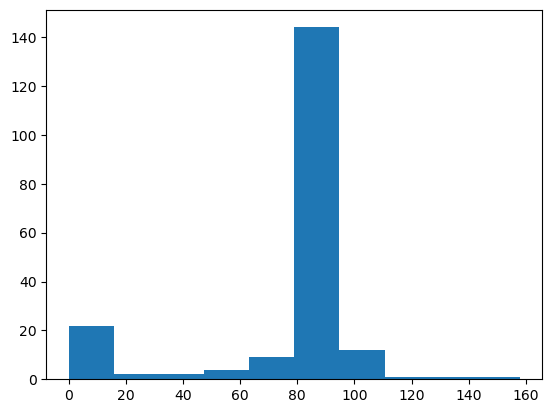

In [ ]:
plt.hist(merged['EventObservablesLL']['mzll'].array())

In [ ]:
zhh_cuts('ll')

[<Cut on nisoleps >= 2>,
 <Cut on 71.2 <= m_{Z} <= 111.2>,
 <Cut on 60.0 <= m_{H1} <= 180.0>,
 <Cut on 60.0 <= m_{H2} <= 180.0>,
 <Cut on p_{t}^{miss} <= 70.0>,
 <Cut on thrust <= 0.9>]

In [49]:
data_all = fetch_preselection_data('/home/ilc/bliewert/DevRepositories/ZHH/scripts/target.root')
data = data_all

for cut in zhh_cuts('ll'):
    print(f'length = {len(data)} prior to', cut)
    data = data[cut(data)]
    
mask = np.ones(len(data_all), dtype=bool)
mask[~np.isin(data_all['event'], data['event'])] = False

length = 198 prior to <Cut on nisoleps >= 2>
length = 177 prior to <Cut on 71.2 <= m_{Z} <= 111.2>
length = 162 prior to <Cut on 60.0 <= m_{H1} <= 180.0>
length = 159 prior to <Cut on 60.0 <= m_{H2} <= 180.0>
length = 153 prior to <Cut on p_{t}^{miss} <= 70.0>
length = 59 prior to <Cut on thrust <= 0.9>


In [ ]:
def prepare_presel_data(input, hypothesis:str):
    dtypes = []
        
    if hypothesis == '':
        
    return np.array()

In [ ]:
LL3 = AnalysisChannel('ZZH, ZZZ', [
    'EventObservablesLL/me_zhh_log',
    'EventObservablesLL/me_zzh_log',
    
    # KinFit ZHH
    'KinFitLL_ZHH/FitErrorCode',
    'KinFitLL_ZHH/Boson2AfterFit',
    'KinFitLL_ZHH/Boson3AfterFit',
    'KinFitLL_ZHH/p1stAfterFit',
    'KinFitLL_ZHH/FitChi2',
    'KinFitLL_ZHH/FitProbability',
    
    # KinFit ZZH
    'KinFitLL_ZZH/FitErrorCode',
    'KinFitLL_ZZH/Boson2AfterFit',
    'KinFitLL_ZZH/Boson3AfterFit',
    'KinFitLL_ZZH/p1stAfterFit',
    'KinFitLL_ZZH/FitChi2',
    'KinFitLL_ZZH/FitProbability',
    
    # KinFit ZZZ
    'KinFitLL_ZZZ/FitErrorCode',
    'KinFitLL_ZZZ/Boson2AfterFit',
    'KinFitLL_ZZZ/Boson3AfterFit',
    'KinFitLL_ZZZ/p1stAfterFit',
    'KinFitLL_ZZZ/FitChi2',
    'KinFitLL_ZZZ/FitProbability',
],
    define_sig=lambda data: np.isin(np.array(data['FinalStates/process'].array()), [zhh.ProcessCategories.e1e1hh, zhh.ProcessCategories.e2e2hh]),
    define_bkg=lambda data: np.isin(np.array(data['FinalStates/process'].array()), [zhh.ProcessCategories.e1e1qqh, zhh.ProcessCategories.e2e2qqh]))

<TBranch 'me_zhh_log' at 0x7fbc49d37d90>

In [19]:
sig['EventObservablesLL/me_zzh_log']

<TBranch 'me_zzh_log' at 0x7fbc49d36790>

In [6]:
from zhh import ProcessIndex

In [ ]:
ProcessIndex()

In [5]:
sig.keys()

['EventObservablesQQ;1',
 'KinFitQQ_ZZZ;2',
 'KinFitQQ_ZZZ;1',
 'KinFitQQ_ZZH;2',
 'KinFitQQ_ZZH;1',
 'KinFitQQ_ZHH;2',
 'KinFitQQ_ZHH;1',
 'KinFitQQ_NMC;2',
 'KinFitQQ_NMC;1',
 'EventObservablesVV;1',
 'KinFitVV_ZZZ;2',
 'KinFitVV_ZZZ;1',
 'KinFitVV_ZZH;2',
 'KinFitVV_ZZH;1',
 'KinFitVV_ZHH;2',
 'KinFitVV_ZHH;1',
 'KinFitVV_NMC;2',
 'KinFitVV_NMC;1',
 'EventObservablesLL;1',
 'KinFitLL_ZZZ;2',
 'KinFitLL_ZZZ;1',
 'KinFitLL_ZZH;2',
 'KinFitLL_ZZH;1',
 'KinFitLL_ZHH;2',
 'KinFitLL_ZHH;1',
 'KinFitLL_NMC;2',
 'KinFitLL_NMC;1',
 'SLDCorrection;4',
 'SLDCorrection;3',
 'SLDCorrection;2',
 'SLDCorrection;1',
 'SLDStatus;4',
 'SLDStatus;3',
 'SLDStatus;2',
 'SLDStatus;1',
 'BHadronType;4',
 'BHadronType;3',
 'BHadronType;2',
 'BHadronType;1',
 'CHadronType;4',
 'CHadronType;3',
 'CHadronType;2',
 'CHadronType;1',
 'PxResidual;8',
 'PxResidual;7',
 'PxResidual;6',
 'PxResidual;5',
 'PxResidual;4',
 'PxResidual;3',
 'PxResidual;2',
 'PxResidual;1',
 'PyResidual;8',
 'PyResidual;7',
 'PyResidua

In [19]:
rf['FinalStates'].keys()

['run',
 'event',
 'error_code',
 'final_states',
 'final_state_counts',
 'final_state_counts/final_state_counts.first',
 'final_state_counts/final_state_counts.second',
 'process',
 'event_category',
 'event_category_zhh',
 'n_fermion',
 'n_higgs',
 'n_b_from_higgs',
 'n_c_from_higgs']

In [ ]:
fsc = np.array(rf['FinalStates']['final_state_counts.second'].array())
nb = fsc[:, 4]

In [132]:
#is_signal = np.array(rf['FinalStates']['n_b_from_higgs'].array() == 4)
#is_signal = np.array(rf['FinalStates']['n_b_from_higgs'].array() == 4)
is_signal = nb == 4

In [133]:
is_signal.nbytes

3989121

In [66]:
PDGs = np.array(rf['FinalStates']['final_state_counts.first'].array(entry_start=0, entry_stop=1))
PDGs

array([[ 1,  2,  3,  4,  5,  6, 11, 12, 13, 14, 15, 16, 21, 22, 23, 24,
        25]], dtype=int32)

In [83]:
np.unique(nb, return_counts=True)

(array([0, 1, 2, 3, 4, 6], dtype=int32),
 array([ 915880,     638, 1901912,     866,  998318,  171507]))

In [78]:
proc = np.array(rf['FinalStates']['process'].array())

In [79]:
proc

array([1511, 1511, 1511, ..., 2520, 2520, 2520], dtype=int32)